In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [3]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 
        'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 
        'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 
        'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)

In [4]:
cars

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

# CLEANING THE DATA

In [6]:
#columns to keep
columns = ['symboling','normalized-losses','num-of-doors','wheel-base',
           'length', 'width','height','curb-weight','num-of-cylinders',
           'engine-size','bore','stroke','compression-rate','horsepower',
           'peak-rpm','city-mpg', 'highway-mpg', 'price']

In [7]:
cars_numeric = cars[columns]

In [8]:
cars_numeric = cars_numeric.replace('?',np.nan)

In [9]:
cars_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   num-of-doors       203 non-null    object 
 3   wheel-base         205 non-null    float64
 4   length             205 non-null    float64
 5   width              205 non-null    float64
 6   height             205 non-null    float64
 7   curb-weight        205 non-null    int64  
 8   num-of-cylinders   205 non-null    object 
 9   engine-size        205 non-null    int64  
 10  bore               201 non-null    object 
 11  stroke             201 non-null    object 
 12  compression-rate   205 non-null    float64
 13  horsepower         203 non-null    object 
 14  peak-rpm           203 non-null    object 
 15  city-mpg           205 non-null    int64  
 16  highway-mpg        205 non

In [10]:
cars_numeric

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,two,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,two,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,two,94.5,171.2,65.5,52.4,2823,six,152,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,four,99.8,176.6,66.2,54.3,2337,four,109,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,four,99.4,176.6,66.4,54.3,2824,five,136,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,four,109.1,188.8,68.9,55.5,2952,four,141,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,four,109.1,188.8,68.8,55.5,3049,four,141,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,four,109.1,188.8,68.9,55.5,3012,six,173,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,four,109.1,188.8,68.9,55.5,3217,six,145,3.01,3.40,23.0,106,4800,26,27,22470


In [11]:
cars_numeric[['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']] = cars_numeric[['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']].astype(float)

In [12]:
cars_numeric['num-of-cylinders'].value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: num-of-cylinders, dtype: int64

In [13]:
to_map = {'four':4, 'six':6, 'five':5, 'eight':8, 'two':2, 'twelve':12, 'three':3}

In [14]:
cars_numeric['num-of-cylinders'] = cars_numeric['num-of-cylinders'].map(to_map)

In [15]:
cars_numeric['num-of-cylinders'].value_counts()

4     159
6      24
5      11
8       5
2       4
12      1
3       1
Name: num-of-cylinders, dtype: int64

In [16]:
cars_numeric['num-of-cylinders'] = cars_numeric['num-of-cylinders'].astype(int)

In [17]:
cars_numeric['normalized-losses'].isnull().value_counts()

False    164
True      41
Name: normalized-losses, dtype: int64

41 rows are null

In [18]:
#I'm going to check for price values that are null. Since the price is my target
#value
cars_numeric['price'].isnull().value_counts()

False    201
True       4
Name: price, dtype: int64

I'm going to remove the rows with no price value and then think up something for the other feature's null

In [19]:
cars_numeric = cars_numeric[cars_numeric['price'].notna()]
#wanted removing price null to affect all other values

In [20]:
#confirming that they're all gone
cars_numeric['price'].isnull().value_counts()

False    201
Name: price, dtype: int64

I'm currently going through the data description of this dataset and decided that symboling is not significant so I'm going to drop it.<br>

In [21]:
#since number of doors feature should be an int, I'm going to drop the nulls
cars_numeric = cars_numeric[cars_numeric['num-of-doors'].notnull()]

In [22]:
cars_numeric = cars_numeric.drop('symboling',axis=1)

In [23]:
cars_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 204
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  163 non-null    float64
 1   num-of-doors       199 non-null    object 
 2   wheel-base         199 non-null    float64
 3   length             199 non-null    float64
 4   width              199 non-null    float64
 5   height             199 non-null    float64
 6   curb-weight        199 non-null    int64  
 7   num-of-cylinders   199 non-null    int32  
 8   engine-size        199 non-null    int64  
 9   bore               195 non-null    float64
 10  stroke             195 non-null    float64
 11  compression-rate   199 non-null    float64
 12  horsepower         197 non-null    float64
 13  peak-rpm           197 non-null    float64
 14  city-mpg           199 non-null    int64  
 15  highway-mpg        199 non-null    int64  
 16  price              199 non

In [24]:
cars_numeric['num-of-doors'].value_counts()

four    113
two      86
Name: num-of-doors, dtype: int64

In [25]:
cars_numeric['num-of-doors'] = cars_numeric['num-of-doors'].map(to_map)

In [26]:
cars_numeric['num-of-doors'] = cars_numeric['num-of-doors'].astype(int)

In [27]:
cars_numeric['normalized-losses'].value_counts()

161.0    11
91.0      8
150.0     7
104.0     6
128.0     6
134.0     6
102.0     5
85.0      5
103.0     5
168.0     5
74.0      5
95.0      5
94.0      5
65.0      5
122.0     4
118.0     4
93.0      4
106.0     4
148.0     3
115.0     3
125.0     3
83.0      3
101.0     3
137.0     3
154.0     3
188.0     2
81.0      2
192.0     2
158.0     2
145.0     2
113.0     2
110.0     2
153.0     2
129.0     2
194.0     2
197.0     2
87.0      2
89.0      2
119.0     2
164.0     2
108.0     2
231.0     1
107.0     1
78.0      1
256.0     1
98.0      1
121.0     1
77.0      1
142.0     1
90.0      1
186.0     1
Name: normalized-losses, dtype: int64

In [28]:
cars_numeric.isnull().sum()

normalized-losses    36
num-of-doors          0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
num-of-cylinders      0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

From research, I discovered that normalized losses column is a value formed by comparing cars together and I'm going to group this column by num of doors column and find each mean and replace nan with these means.

In [29]:
cars_losses = cars_numeric.groupby(['num-of-doors'])['normalized-losses'].transform('mean')
cars_losses

0      138.867647
1      138.867647
2      138.867647
3      109.652632
4      109.652632
          ...    
200    109.652632
201    109.652632
202    109.652632
203    109.652632
204    109.652632
Name: normalized-losses, Length: 199, dtype: float64

In [30]:
cars_numeric['normalized-losses'].fillna(value=cars_losses, inplace=True)

In [31]:
cars_numeric['normalized-losses'].isnull().sum()

0

In [32]:
cars_numeric['normalized-losses'].value_counts()

109.652632    18
138.867647    18
161.000000    11
91.000000      8
150.000000     7
104.000000     6
128.000000     6
134.000000     6
168.000000     5
95.000000      5
74.000000      5
102.000000     5
85.000000      5
65.000000      5
94.000000      5
103.000000     5
122.000000     4
106.000000     4
93.000000      4
118.000000     4
101.000000     3
115.000000     3
137.000000     3
148.000000     3
125.000000     3
154.000000     3
83.000000      3
108.000000     2
87.000000      2
158.000000     2
192.000000     2
188.000000     2
81.000000      2
110.000000     2
145.000000     2
197.000000     2
194.000000     2
164.000000     2
89.000000      2
113.000000     2
129.000000     2
119.000000     2
153.000000     2
107.000000     1
77.000000      1
186.000000     1
90.000000      1
256.000000     1
98.000000      1
121.000000     1
142.000000     1
231.000000     1
78.000000      1
Name: normalized-losses, dtype: int64

I'm going to fill other null values with the mean of the columns

In [33]:
cars_numeric.fillna(cars_numeric.mean(), inplace=True)

In [34]:
cars_numeric.isnull().sum()

normalized-losses    0
num-of-doors         0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
num-of-cylinders     0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

I'm going to create a new feature called combined mpg which would contain 55% of city-mpg and 45% of highway-mpg.<br>
Then I would drop both city and highway-mpg

In [35]:
#creating the new feature
cars_numeric['combined-mpg']= (cars_numeric['city-mpg']*0.55)+(cars_numeric['highway-mpg']*0.45)

In [36]:
#droping the two previous features
cars_numeric = cars_numeric.drop(['city-mpg','highway-mpg'], axis=1)

In [37]:
#great!, now it's time to normalize all the features except the target column, price
price_col = cars_numeric['price']
normalized_cars = (cars_numeric - cars_numeric.min())/(cars_numeric.max()-cars_numeric.min())
normalized_cars['price'] = price_col

In [38]:
#checking my columns
normalized_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 204
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  199 non-null    float64
 1   num-of-doors       199 non-null    float64
 2   wheel-base         199 non-null    float64
 3   length             199 non-null    float64
 4   width              199 non-null    float64
 5   height             199 non-null    float64
 6   curb-weight        199 non-null    float64
 7   num-of-cylinders   199 non-null    float64
 8   engine-size        199 non-null    float64
 9   bore               199 non-null    float64
 10  stroke             199 non-null    float64
 11  compression-rate   199 non-null    float64
 12  horsepower         199 non-null    float64
 13  peak-rpm           199 non-null    float64
 14  price              199 non-null    float64
 15  combined-mpg       199 non-null    float64
dtypes: float64(16)
memory usag

# UNIVARIATE K-NEAREST NEIGHBORS MODELS

In [39]:
def knn_train_test(df, train_col, target_col):
    #shuffling the data
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    shuffled_df = df.reindex(shuffled_index)
    #shuffled_df = shuffled_df.drop([0], axis=0)
    
    #spliting the dataset into train and test set
    split_value = int(len(shuffled_df)/2)
    train_set = shuffled_df.iloc[0:split_value]
    test_set = shuffled_df.iloc[split_value:]
    
    #training and predicting
    knn = KNeighborsRegressor()
    knn.fit(train_set[[train_col]], train_set[target_col])
    predictions = knn.predict(test_set[[train_col]])
    mse = mean_squared_error(test_set[target_col], predictions)
    rsme = np.sqrt(mse)
    return rsme

# training all the numeric columns in normalized_cars using knn_train_test function
target_col = normalized_cars.columns.drop('price')
rmses = {}
for col in target_col:
    rmse_val = knn_train_test(normalized_cars, col, 'price')
    rmses[col]=rmse_val

#creating a Series to be able to view this easily and also sort the values
rmse_results = pd.Series(rmses)
rmse_results.sort_values()

engine-size          3143.482717
curb-weight          3927.282146
combined-mpg         4243.906599
horsepower           4278.831582
wheel-base           4742.033500
width                4953.262748
length               5203.496866
num-of-cylinders     5411.928223
peak-rpm             5983.115081
compression-rate     6418.044726
height               7058.874059
normalized-losses    7071.095702
bore                 7272.187241
stroke               7650.940272
num-of-doors         7677.389125
dtype: float64

In [40]:
def knn_train_test(df, train_col, target_col):
    #shuffling the data
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    shuffled_df = df.reindex(shuffled_index)
    #shuffled_df = shuffled_df.drop([0], axis=0)
    
    #spliting the dataset into train and test set
    split_value = int(len(shuffled_df)/2)
    train_set = shuffled_df.iloc[0:split_value]
    test_set = shuffled_df.iloc[split_value:]
    
    k_values = [1, 3, 5, 7, 9]
    k_rmses = {}
    
    #training and predicting
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_set[[train_col]], train_set[target_col])
        predictions = knn.predict(test_set[[train_col]])
        mse = mean_squared_error(test_set[target_col], predictions)
        rmse = np.sqrt(mse)
        k_rmses[k] = rmse
    return k_rmses

# training all the numeric columns in normalized_cars using knn_train_test function
target_cols = normalized_cars.columns.drop('price')
k_rmses_target = {}
for cols in target_cols:
    rmse_vals = knn_train_test(normalized_cars, cols, 'price')
    k_rmses_target[cols]=rmse_vals

k_rmses_target

{'normalized-losses': {1: 8708.383449871739,
  3: 7172.307002321886,
  5: 7071.095701629274,
  7: 7172.9445463562615,
  9: 7150.876855133498},
 'num-of-doors': {1: 8141.798126335484,
  3: 7387.716968725859,
  5: 7677.389125373286,
  7: 7769.642855277932,
  9: 7622.4047118419985},
 'wheel-base': {1: 3706.7955217411168,
  3: 4783.151470874965,
  5: 4742.033500050375,
  7: 4682.74771039223,
  9: 4833.392740286253},
 'length': {1: 5781.317550524275,
  3: 5067.709409475733,
  5: 5203.496865570306,
  7: 5131.565685986279,
  9: 5089.239565913484},
 'width': {1: 5214.673562170503,
  3: 5542.386583012371,
  5: 4953.262747724978,
  7: 4626.0404051413125,
  9: 4541.70680619707},
 'height': {1: 8754.26538894041,
  3: 7229.875071150569,
  5: 7058.87405908336,
  7: 6985.003762507568,
  9: 6874.649825030372},
 'curb-weight': {1: 5433.313512949533,
  3: 4193.787606289411,
  5: 3927.2821462685874,
  7: 3570.5184768133195,
  9: 3802.0896407010086},
 'num-of-cylinders': {1: 7986.3742067348685,
  3: 5563.

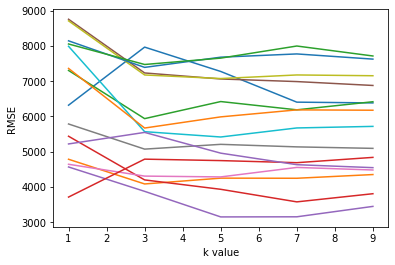

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

for k,v in sorted(k_rmses_target.items()):
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y, "", markersize=20)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    #lt.legend(label)
    #print(label)
    

# MULTIVARIATE MODEL

Need to find the average of k_rmses_target in order to find the best features and be able to use it to rain the multivariate k-nearest neighbors model

In [42]:
k_rmses_avg={}
for k, v in k_rmses_target.items():
    k_rmses_avg[k] = np.mean(list(v.values()))


k_rmses_series = pd.Series(k_rmses_avg).sort_values()
print(k_rmses_series)
sorted_features = k_rmses_series.index

engine-size          3632.503463
curb-weight          4185.398277
combined-mpg         4337.914058
horsepower           4448.362166
wheel-base           4549.624189
width                4975.614021
length               5254.665815
num-of-cylinders     6068.702215
peak-rpm             6272.362188
compression-rate     6449.523339
bore                 6866.042390
height               7380.533621
normalized-losses    7455.121511
num-of-doors         7719.790358
stroke               7775.713916
dtype: float64


In [43]:
def knn_train_test(df, train_col, target_col):
    #shuffling the data
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    shuffled_df = df.reindex(shuffled_index)
    #shuffled_df = shuffled_df.drop([0], axis=0)
    
    #spliting the dataset into train and test set
    split_value = int(len(shuffled_df)/2)
    train_set = shuffled_df.iloc[0:split_value]
    test_set = shuffled_df.iloc[split_value:]
    
    #training and predicting
    knn = KNeighborsRegressor()
    knn.fit(train_set[train_col], train_set[target_col])
    predictions = knn.predict(test_set[train_col])
    mse = mean_squared_error(test_set[target_col], predictions)
    rsme = np.sqrt(mse)
    return rsme

# training all the numeric columns in normalized_cars using knn_train_test function

rmses = {}
for i in range(2,7):
    col = sorted_features[:i]
    rmse_val = knn_train_test(normalized_cars, col, 'price')
    rmses[i]=rmse_val

#creating a Series to be able to view this easily and also sort the values
rmse_results = pd.Series(rmses).sort_values()
#rmse_results.index=['engine-size','curb-weight','combined-mpg','horsepower','wheel-base']
rmse_results

2    3021.070316
4    3315.773337
3    3445.602991
6    3500.538206
5    3569.982342
dtype: float64

# HYPERPARAMETER TUNING

In [44]:
def knn_train_test(df, train_col, target_col):
    #shuffling the data
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    shuffled_df = df.reindex(shuffled_index)
    #shuffled_df = shuffled_df.drop([0], axis=0)
    
    #spliting the dataset into train and test set
    split_value = int(len(shuffled_df)/2)
    train_set = shuffled_df.iloc[0:split_value]
    test_set = shuffled_df.iloc[split_value:]
    
    hyper_params = list(range(1,26))
    k_rmses = {}
    
    #training and predicting
    for k in hyper_params:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_set[train_col], train_set[target_col])
        predictions = knn.predict(test_set[train_col])
        mse = mean_squared_error(test_set[target_col], predictions)
        rmse = np.sqrt(mse)
        k_rmses[k] = rmse
    return k_rmses

# training all the numeric columns in normalized_cars using knn_train_test function
rmses_b = {}
for i in [2,4,3]:
    col = sorted_features[:i]
    rmse_val = knn_train_test(normalized_cars, col, 'price')
    rmses_b[i]=rmse_val
    
rmses_b

{2: {1: 3438.1506686007815,
  2: 2734.5756005274384,
  3: 3071.9522175103357,
  4: 2855.0260794561927,
  5: 3021.0703163614053,
  6: 3139.5141360213333,
  7: 3165.4092952296915,
  8: 3265.2613269987673,
  9: 3481.554228278578,
  10: 3620.6892542580895,
  11: 3666.5217321367954,
  12: 3790.9544269971707,
  13: 3866.2181554386952,
  14: 3845.709516441269,
  15: 3932.5463532423873,
  16: 3938.298388630631,
  17: 3867.6462043702923,
  18: 3897.1337753882153,
  19: 3953.1170113155463,
  20: 3978.763182061104,
  21: 4025.198233284115,
  22: 4077.0618550592703,
  23: 4106.686989150988,
  24: 4162.628447830469,
  25: 4215.768603816865},
 4: {1: 3830.7768076461984,
  2: 3581.685805594902,
  3: 3683.9483163825435,
  4: 3325.372903901155,
  5: 3315.773337066332,
  6: 3360.9398072645627,
  7: 3457.653228885813,
  8: 3605.0751763789544,
  9: 3682.533955841537,
  10: 3786.2890911154686,
  11: 3744.264359695941,
  12: 3675.39940404252,
  13: 3748.3850336160353,
  14: 3795.56907433671,
  15: 3886.7058

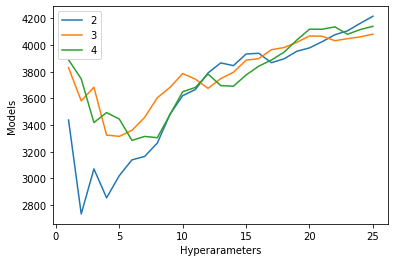

In [45]:
%matplotlib inline
for k,v in rmses_b.items():
    x = list(v.keys())
    y = list(v.values())
    
    
    plt.plot(x,y)
    plt.xlabel('Hyperarameters')
    plt.ylabel('Models')
    plt.legend([2,3,4])

For the model with two features, the optimal k value is 2<br>
For the model with three features, the optimal k value is 6<br>
For the model with four features, the optimal k value is 5<br>